In [1]:
import os, json
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [32]:
PATH = "..\\tubs\\tub5"

In [33]:
json_files = [file for file in os.listdir(PATH) if file.endswith('json') ]

In [34]:
len(json_files)

38575

In [35]:
meta_json = pd.read_json(f'{PATH}/{json_files[0]}')

In [36]:
meta_json

,inputs,types
0,cam/image_array,image_array
1,user/angle,float
2,user/throttle,float
3,user/mode,str
4,timestamp,str


In [39]:
with open(f'{PATH}/{json_files[1]}', 'r') as f:
    data = json.load(f)

In [40]:
data["user/throttle"]

0.08

In [41]:
df = pd.DataFrame(data, index = [0])

In [42]:
df

,cam/image_array,user/throttle,user/angle,timestamp,user/mode
0,0_cam-image_array_.jpg,0.08,0.01,None,user


In [43]:
df["cam/image_array"][0]

'0_cam-image_array_.jpg'

In [50]:
df = pd.DataFrame()
i = 0
for i, j in enumerate(json_files[1:10000]):
    with open(f'{PATH}/{j}') as f:
        data = json.load(f)
        
        userThrottle = data["user/throttle"]
        userAngle = data["user/angle"]
        camImage_array = data["cam/image_array"]
        index = int(camImage_array[:-21])
        df_row = pd.DataFrame([[userThrottle, userAngle, camImage_array]], index = [index], columns = ["user/throttle", "user/angle", "cam/image_array"])
        
        df = df.append(df_row)

In [51]:
df = df.sort_index()

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


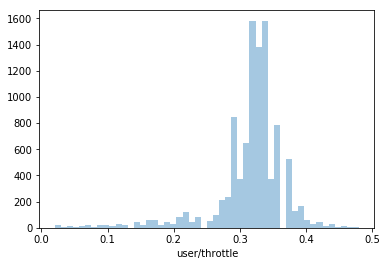

In [52]:
sns.distplot(df["user/throttle"], kde=False)

C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


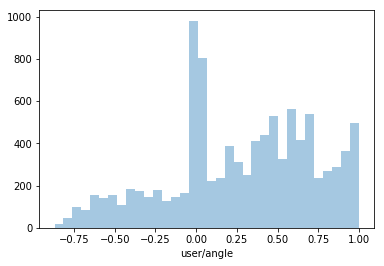

In [53]:
sns.distplot(df["user/angle"], kde=False)

C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


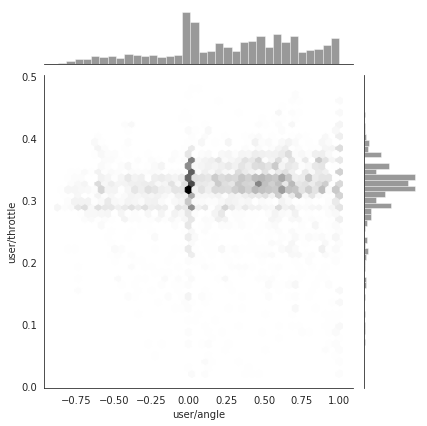

In [54]:
with sns.axes_style("white"):
    sns.jointplot(x=df["user/angle"], y=df["user/throttle"], kind="hex", color="k")

In [55]:
df_x = df.drop(labels=["cam/image_array"], axis = 1)

In [56]:
df_x.head()

,user/throttle,user/angle
0,0.08,0.01
1,0.12,-0.03
10,0.25,-0.23
11,0.25,-0.23
12,0.24,-0.23


C:\Users\Jason\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


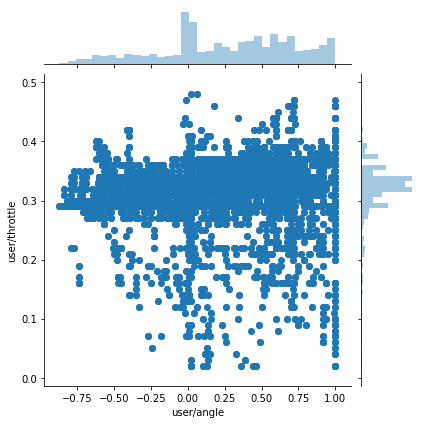

In [57]:
sns.jointplot(x="user/angle", y="user/throttle", data=df_x)

In [58]:
from IPython.display import Image

In [59]:
df["cam/image_array"][1000]

'1000_cam-image_array_.jpg'

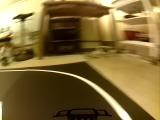

In [60]:
Image(f'{PATH}/{df.iloc[530][2]}')

In [61]:
df.iloc[515][2]

'1414_cam-image_array_.jpg'

In [62]:
df.iloc[500:530]["user/angle"]

1399   -0.24
1400   -0.24
1401   -0.22
1402   -0.22
1403   -0.16
1404   -0.16
1405   -0.08
1406   -0.08
1407   -0.04
1408   -0.04
1409   -0.03
1410   -0.03
1411   -0.05
1412   -0.05
1413   -0.19
1414   -0.19
1415   -0.42
1416   -0.42
1417   -0.49
1418   -0.49
1419   -0.53
1420   -0.53
1421   -0.50
1422   -0.50
1423   -0.50
1424   -0.50
1425   -0.51
1426   -0.51
1427   -0.50
1428   -0.55
Name: user/angle, dtype: float64

In [63]:
df["user/angle"][1000]

-0.52

In [64]:
df["cam/image_array"][200][:-21]

KeyError: 200

In [65]:
import matplotlib.pyplot as plt

In [66]:
df_steering = pd.DataFrame(df.iloc[200:1000]["user/angle"])

In [67]:
df_steering

,user/angle
1099,0.01
1100,0.01
1101,0.02
1102,0.02
1103,0.01
1104,0.01
1105,0.04
1106,0.04
1107,0.04
1108,0.01


<Figure size 432x288 with 0 Axes>

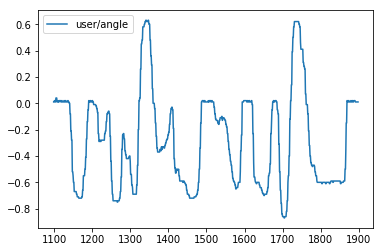

In [68]:
plt.figure(); df_steering.plot()

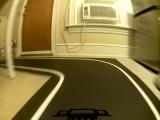

In [82]:
Image(f'{PATH}/{df.iloc[240][2]}')

In [83]:
df.iloc[240]["user/angle"]

0.01

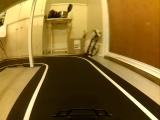

In [88]:
Image(f'{PATH}/{df.iloc[300][2]}')

In [89]:
df.iloc[300]["user/angle"]

0.01

In [90]:
df.iloc[240:300]

,user/throttle,user/angle,cam/image_array
1139,0.34,0.01,1139_cam-image_array_.jpg
1140,0.31,0.00,1140_cam-image_array_.jpg
1141,0.31,0.00,1141_cam-image_array_.jpg
1142,0.31,-0.08,1142_cam-image_array_.jpg
1143,0.31,-0.08,1143_cam-image_array_.jpg
1144,0.29,-0.21,1144_cam-image_array_.jpg
1145,0.29,-0.21,1145_cam-image_array_.jpg
1146,0.29,-0.28,1146_cam-image_array_.jpg
1147,0.29,-0.28,1147_cam-image_array_.jpg
1148,0.30,-0.52,1148_cam-image_array_.jpg


<Figure size 432x288 with 0 Axes>

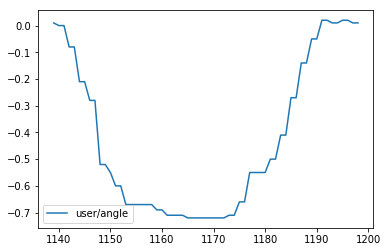

In [91]:
df_steering = pd.DataFrame(df.iloc[240:300]["user/angle"])
plt.figure(); df_steering.plot()

<Figure size 432x288 with 0 Axes>

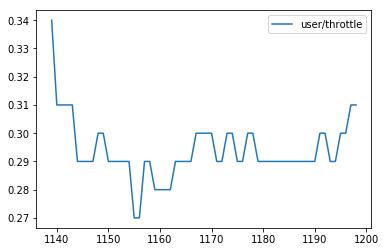

In [92]:
df_throttle = pd.DataFrame(df.iloc[240:300]["user/throttle"])
plt.figure(); df_throttle.plot()